In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

^C


In [ ]:
!unzip eye-diseases-classification.zip

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
#     print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

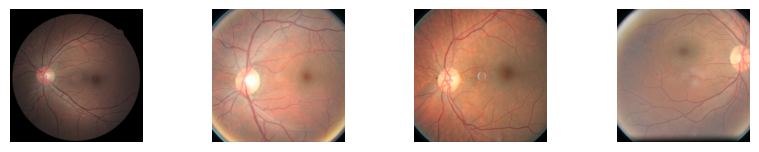

In [ ]:
data,result = load_images("/content/dataset/")

In [ ]:
data

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 2, 1],
         [1, 2, 1],
         [1, 2, 1],
         ...,
         [1, 5, 4],
         [1, 5, 4],
         [1, 5, 4]],

        [[1, 3, 2],
         [2,

In [ ]:
t = pd.Series(result,dtype='category').cat.codes

In [ ]:
t

,0
0,1
1,1
2,1
3,1
4,1
...,...
4212,2
4213,2
4214,2
4215,2


In [ ]:
data_dir = '/content/dataset'

def preprocess_image(image):
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (224, 224))
    image = cv.GaussianBlur(image, (5, 5), 0)
    image = cv.equalizeHist(image)
    image = image / 255.0
    return image



In [ ]:
def load_and_preprocess_images(data_dir, img_size=(512, 512), batch_size=100):
    images = []
    labels = []
    categories = os.listdir(data_dir)
    total_images = 0
    for category in categories:
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.png'))]
            total_images += len(files)

    processed_images = 0
    for category in categories:
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for i, file in enumerate(os.listdir(category_path)):
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_path = os.path.join(category_path, file)
                    image = cv.imread(image_path)
                    image = cv.resize(image, img_size)
                    image = preprocess_image(image)
                    images.append(image)
                    labels.append(category)

                    processed_images += 1
                    if processed_images % batch_size == 0:
                        print(f"Processed {processed_images}/{total_images} images...")

                    # Yielding after every batch
                    if processed_images % batch_size == 0:
                        yield np.array(images), np.array(labels)
                        images, labels = [], []

    # Yield remaining images
    if images:
        yield np.array(images), np.array(labels)

In [ ]:
# Example usage:
for images_batch, labels_batch in load_and_preprocess_images(data_dir):
    # Process the batch here
    print(f"Batch size: {len(images_batch)}")


Processed 100/3119 images...
Batch size: 100
Processed 200/3119 images...
Batch size: 100
Processed 300/3119 images...
Batch size: 100
Processed 400/3119 images...
Batch size: 100
Processed 500/3119 images...
Batch size: 100
Processed 600/3119 images...
Batch size: 100
Processed 700/3119 images...
Batch size: 100
Processed 800/3119 images...
Batch size: 100
Processed 900/3119 images...
Batch size: 100
Processed 1000/3119 images...
Batch size: 100
Processed 1100/3119 images...
Batch size: 100
Processed 1200/3119 images...
Batch size: 100
Processed 1300/3119 images...
Batch size: 100
Processed 1400/3119 images...
Batch size: 100
Processed 1500/3119 images...
Batch size: 100
Processed 1600/3119 images...
Batch size: 100
Processed 1700/3119 images...
Batch size: 100
Processed 1800/3119 images...
Batch size: 100
Processed 1900/3119 images...
Batch size: 100
Processed 2000/3119 images...
Batch size: 100
Processed 2100/3119 images...
Batch size: 100
Processed 2200/3119 images...
Batch size: 1

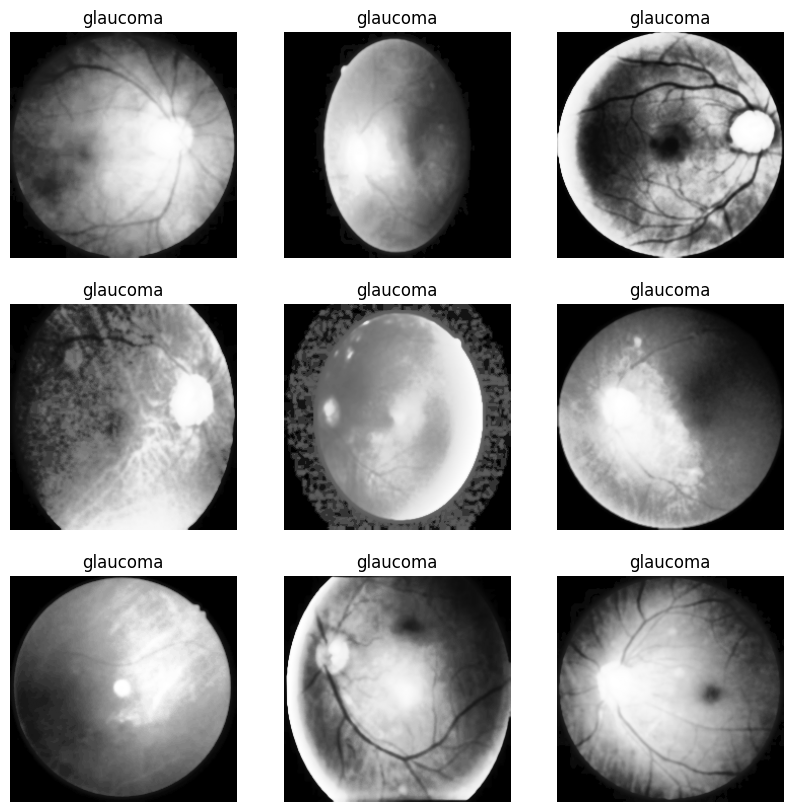

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(min(9, len(images_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_batch[i], cmap='gray')
    plt.title(labels_batch[i])
    plt.axis('off')
plt.show()

Saving eye1.png to eye1 (1).png


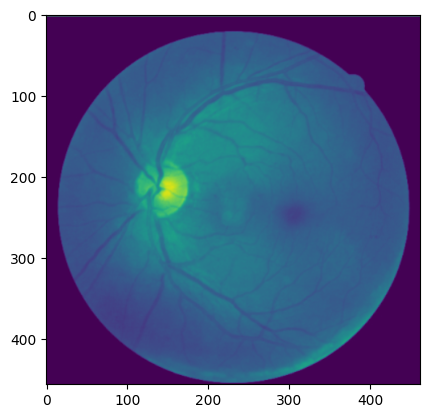

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image

uploaded = files.upload()
if uploaded:  # Check if uploaded is not empty
    image_path = next(iter(uploaded))
    # Open the image using PIL to handle potential alpha channels
    image = Image.open(image_path).convert("RGB")
    image = np.array(image) # Convert the PIL image to a NumPy array
    image.shape
    plt.imshow(image)
else:
    print("No file uploaded.")
    # Handle this case, e.g., provide a default image path or exit

gray = rgb2gray(image)
plt.imshow(gray)

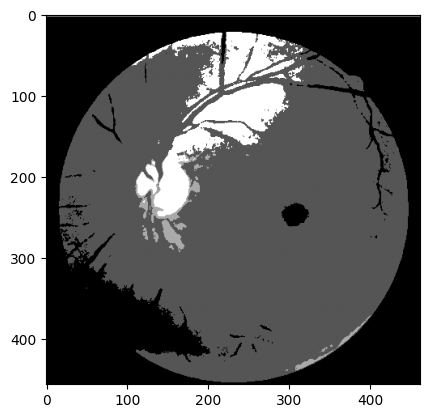

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

(457, 462)

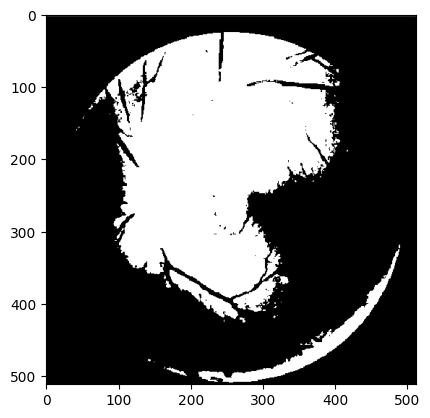

In [ ]:
gray = Image.fromarray(gray).resize((512, 512), Image.NEAREST)
gray = np.array(gray)

# Reshape the grayscale image to a 1D array
gray_r = gray.reshape(gray.shape[0] * gray.shape[1])

# Apply thresholding
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0

# Reshape back to the original dimensions
gray = gray_r.reshape(512, 512)

# Display the thresholded image
plt.imshow(gray, cmap='gray')
plt.show()

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(data ,t , test_size = 0.10 , shuffle = True , random_state = 10)

In [ ]:
print(f"x_train shape before reshaping: {np.array(x_train).shape}")
print(f"x_test shape before reshaping: {np.array(x_test).shape}")


x_train shape before reshaping: (3795, 256, 256, 3)
x_test shape before reshaping: (422, 256, 256, 3)


In [ ]:
x_train_resized = np.array([cv.resize(img, (224, 224)) for img in x_train])
x_test_resized = np.array([cv.resize(img, (224, 224)) for img in x_test])

In [ ]:
print(f"x_train shape after resizing: {x_train_resized.shape}")
print(f"x_test shape after resizing: {x_test_resized.shape}")

x_train shape after resizing: (3795, 224, 224, 3)
x_test shape after resizing: (422, 224, 224, 3)


In [ ]:
import tensorflow.keras as keras

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input

# Download the pre-trained weights file (if not already present)
!wget https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

# Define the input tensor with the correct shape
input_tensor = Input(shape=(224, 224, 3))  # VGG16 expects 224x224x3 input

# Load the VGG16 model with custom weights
modelVGG = VGG16(
    include_top=False,
    weights=None,  # Set to None as you will load custom weights
    input_tensor=input_tensor
)

# Load custom weights into the model
modelVGG.load_weights('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', by_name=True)

--2025-03-10 13:40:42--  https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889256 (56M) [application/octet-stream]
Saving to: ‘vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5’

vgg16_weights_tf_di 100%[===================>]  56.16M   296MB/s    in 0.2s    

2025-03-10 13:40:42 (296 MB/s) - ‘vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [58889256/58889256]



In [ ]:
for layer in modelVGG.layers:
    layer.trainable = False

In [ ]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(4096, activation='relu')(top_model)
        top_model = Dropout(0.5, name='dropout_1')(top_model)
        top_model = Dense(4096, activation='relu')(top_model)
        top_model = Dense(4, activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input, outputs = FC_Head)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       2,101,2

 Total params: 33,613,636 (128.23 MB)

 Trainable params: 18,898,948 (72.09 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.0001) , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_resized, y_train, epochs=10, validation_data=(x_test_resized, y_test), verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


119/119 ━━━━━━━━━━━━━━━━━━━━ 53s 316ms/step - accuracy: 0.6605 - loss: 1.0554 - val_accuracy: 0.8318 - val_loss: 0.4411
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 53s 185ms/step - accuracy: 0.8248 - loss: 0.4804 - val_accuracy: 0.8934 - val_loss: 0.2727
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.8661 - loss: 0.3692 - val_accuracy: 0.8720 - val_loss: 0.3092
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 23s 192ms/step - accuracy: 0.8902 - loss: 0.2913 - val_accuracy: 0.9005 - val_loss: 0.2598
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.8925 - loss: 0.2815 - val_accuracy: 0.8341 - val_loss: 0.4623
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 200ms/step - accuracy: 0.9019 - loss: 0.2491 - val_accuracy: 0.8934 - val_loss: 0.2546
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 39s 187ms/step - accuracy: 0.9092 - loss: 0.2317 - val_accuracy: 0.8981 - val_loss: 0.2446
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.9241 - loss: 0.1980 - val

In [ ]:
loss,aac = model.evaluate(x_train_resized, y_train)

119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.9730 - loss: 0.0869


In [ ]:
loss,aac = model.evaluate(x_test_resized, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.8997 - loss: 0.2153


In [ ]:
def names(number):
    if number==0:
        return "Cataract"
    elif number==1:
        return "Diabetic Retinopathy"
    elif number==2:
        return "Glaucoma"
    elif number==3:
        return "Normal"

In [ ]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = model.predict_on_batch(x)
    classification = np.argmax(res)
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_19']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


99.99996423721313% Confidence Diabetic Retinopathy


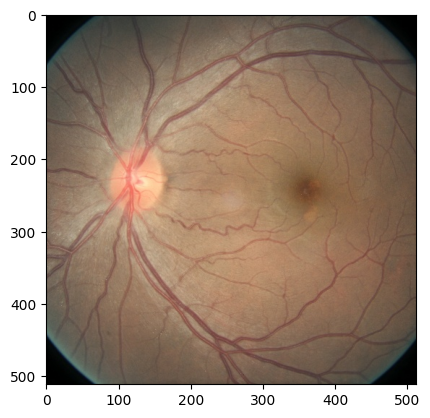

In [ ]:
img = Image.open(r"/content/dataset/diabetic_retinopathy/10009_right.jpeg")
Prediction(img)

99.11202788352966% Confidence Cataract


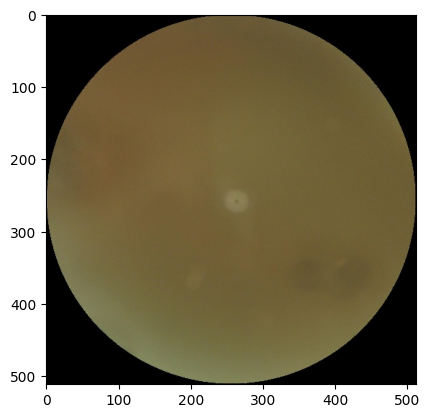

In [ ]:
img = Image.open(r"/content/dataset/cataract/0_left.jpg")
Prediction(img)

In [ ]:
model.save('model.h5')